## Importing the dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data Preprocessing

In [2]:
# Loading the data from csv file to pandas dataframe
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
# Checking the number of rows and columns
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum() # No null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print("Fuel_Type: ", df["Fuel_Type"].unique())
print("Seller_Type: ", df["Seller_Type"].unique())
print("Transmission_Type: ", df["Transmission"].unique())

Fuel_Type:  ['Petrol' 'Diesel' 'CNG']
Seller_Type:  ['Dealer' 'Individual']
Transmission_Type:  ['Manual' 'Automatic']


In [8]:
# Checking the distribution of categorical data
print(df["Fuel_Type"].value_counts())
print("---------------------------------")
print(df["Seller_Type"].value_counts())
print("---------------------------------")
print(df["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Encoding the categorical data

In [9]:
# Encoding Fuel_Type Column
newDf = df.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}})
newDf

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [10]:
# Encoding the Seller_Type Column
newDf = newDf.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}})
newDf

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [11]:
# Encoding the Tranmission Column
newDf = newDf.replace({"Transmission": {"Manual": 0, "Automatic": 1}})
newDf

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


#### Getting the insight of the dataframe

In [12]:
newDf.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [13]:
newDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301.0,0.212625,0.425801,0.00,0.0,0.0,0.0,2.0
Seller_Type,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission,301.0,0.132890,0.340021,0.00,0.0,0.0,0.0,1.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


#### EDA

In [14]:
# Finding the correlation
cor = newDf.corr()
cor

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


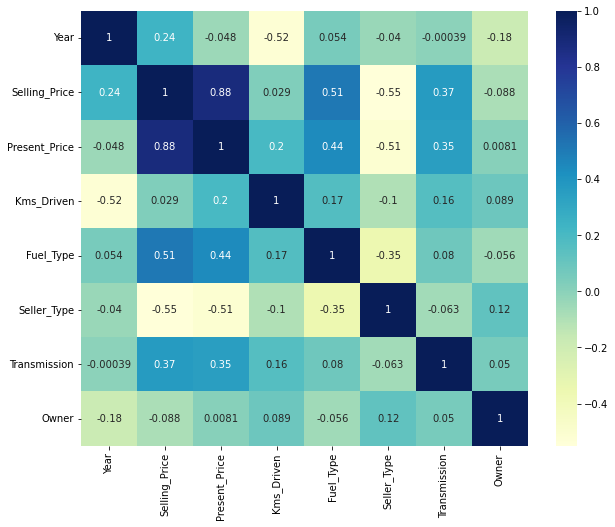

In [15]:
# Plotting the correlation graph
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Selecting the target column and the input data

In [16]:
# Input data
X = newDf.drop(['Car_Name', 'Selling_Price'], axis=1)
# Output data
y = newDf["Selling_Price"]

In [17]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [18]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


### Finding the most important columns for the prediction

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [20]:
model.feature_importances_

array([0.078969  , 0.41389641, 0.04086879, 0.14048885, 0.24618672,
       0.07890033, 0.00068989])

<AxesSubplot:>

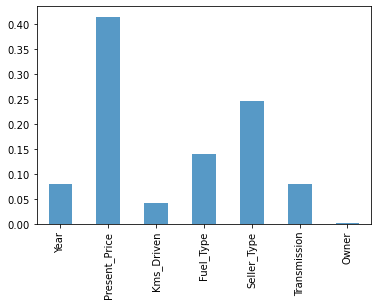

In [21]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar', alpha=0.75, rot=90)

#### Spliting the data into train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Importing the Regression Models

In [23]:
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Model Training

In [24]:
modelName = []
train_r2_Score = []
test_r2_Score = []

### 1. Linear Regression

In [25]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Train Prediction
train_predict = linReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = linReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("Linear Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 2. XGB Regression

In [26]:
xgbReg = XGBRegressor(objective ='reg:squarederror')
xgbReg.fit(X_train, y_train)

# Train Prediction
train_predict = xgbReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = xgbReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("XGB Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 3. SGD Regression

In [27]:
sgdReg = SGDRegressor()
sgdReg.fit(X_train, y_train)

# Train Prediction
train_predict = sgdReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = sgdReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("SGD Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 4. KernelRidge Regression

In [28]:
krReg = KernelRidge()
krReg.fit(X_train, y_train)

# Train Prediction
train_predict = krReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = krReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("KernelRidge Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 5. ElasticNet Regression

In [29]:
enReg = ElasticNet()
enReg.fit(X_train, y_train)

# Train Prediction
train_predict = enReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = enReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("ElasticNet Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 6. BayesianRidge Regression

In [30]:
brReg = BayesianRidge()
brReg.fit(X_train, y_train)

# Train Prediction
train_predict = brReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = brReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("BayesianRidge Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 7. GradientBoosting Regression

In [31]:
gbReg = GradientBoostingRegressor()
gbReg.fit(X_train, y_train)

# Train Prediction
train_predict = gbReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = gbReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("GradientBoosting Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 8. SVR Regression

In [32]:
svrReg = SVR()
svrReg.fit(X_train, y_train)

# Train Prediction
train_predict = svrReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = svrReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("SVR Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)


### 9. DecisionTree Regression

In [33]:
dtReg = DecisionTreeRegressor()
dtReg.fit(X_train, y_train)

# Train Prediction
train_predict = dtReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = dtReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("DecisionTree Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)

### 10. RandomForest Regression

In [34]:
rfReg = RandomForestRegressor()
rfReg.fit(X_train, y_train)

# Train Prediction
train_predict = rfReg.predict(X_train)
train_r2 = r2_score(train_predict, y_train)

# Test Prediction
test_predict = rfReg.predict(X_test)
test_r2 = r2_score(test_predict, y_test)

# Appending the values
modelName.append("RandomForest Regression")
train_r2_Score.append(train_r2)
test_r2_Score.append(test_r2)

In [35]:
df = pd.DataFrame(list(zip(modelName, train_r2_Score, test_r2_Score)), columns =['Model Name', 'Train R2 Score', 'Test R2 Score'])
df

,Model Name,Train R2 Score,Test R2 Score
0,Linear Regression,0.848492,0.889063
1,XGB Regression,0.999996,0.953553
2,SGD Regression,-0.961481,-2.582759
3,KernelRidge Regression,0.798247,0.825117
4,ElasticNet Regression,0.790943,0.779399
5,BayesianRidge Regression,0.846454,0.885324
6,GradientBoosting Regression,0.995923,0.952836
7,SVR Regression,-18.954362,-18.853458
8,DecisionTree Regression,1.000000,0.960960
9,RandomForest Regression,0.985597,0.956482


In [36]:
df.where(df['Test R2 Score'] == df['Test R2 Score'].max())

,Model Name,Train R2 Score,Test R2 Score
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,DecisionTree Regression,1.0,0.96096
9,NaN,NaN,NaN


## Conclusion
#### After running all the known algorithm, we found that the RandomForest Regressor gives the best output
#### But as the dataset increases it will take more time for RandomForest Regressor to predict the output
#### Hence i will use the XGB Regressor which gives the same outcomes as that of a RandomForest Regressor

# Note: Use if you want to use XGB Regressor you have to explicitly install it

In [37]:
finalModel = RandomForestRegressor()
finalModel.fit(X_train.values, y_train)
finalModel.score(X_test, y_test)

0.9522507503750198

In [38]:
# Predicting the test data
test_Predictions = finalModel.predict(X_test)

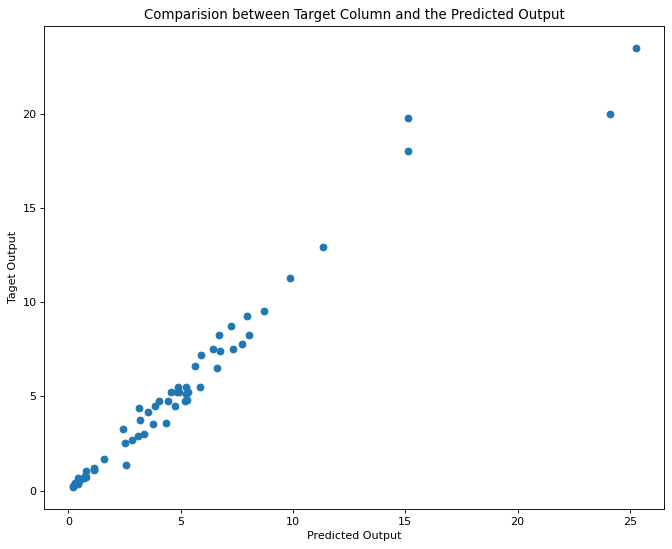

In [39]:
# Plotting the Test Predictions and the Output columns
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(test_Predictions, y_test)
plt.ylabel("Taget Output")
plt.xlabel("Predicted Output")
plt.title("Comparision between Target Column and the Predicted Output")
plt.show()

## Storing the model.

In [40]:
import pickle
with open('Car_Predictor.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(finalModel, file)

In [41]:
Years_old = 2010
Present_Price = 100000
Kms_Driven = 120000
Fuel_Type = 1
Seller_Type = 0
Transmission = 0
Owner = 1
## Year	Present_Price	Kms_Driven	Fuel_Type	Seller_Type	Transmission	Owner
x = [Years_old, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
print(x)
prediction = finalModel.predict([x])
output = round(prediction[0], 2)
print(output)

[2010, 100000, 120000, 1, 0, 0, 1]
28.7


In [42]:
# from joblib import dump, load
# dump(finalModel, 'Car_Predict.joblib') 

['Car_Predict.joblib']